In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# <font color = 'red'> ЛР 7. Метод главных компонент </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 16.11.2023

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Метод главных компонент.  </font>

Метод главных компонент (PCA) - классический метод понижения размерности данных. 

Пусть задана матрица информации, содержащая векторы с информацией о данных. $$X=\left(
\begin{array}{cccc}
 x_{1,1} & x_{1,2} & ... & x_{1,m} \\
 x_{2,1} & x_{2,2} & ... & x_{2,m} \\
 ... & ... & ... & ... \\
 x_{n,1} & x_{4,n} & ... & x_{n,m} \\
\end{array}
\right)$$

Как видим рассматриваем $n$ сэмплов и $m$ фич (признаков). Задача **понижения размерности** заключается в преобразовании исходных данных, таким образом, чтобы исходная информации хранилась с использованием меньшего числа фич $k<n$ с сохранением её ценности. Этот метот относится к классу методов **обучения без учителя**, поэтому в нём отсутсвуют целевые метки.

Для решения задачи введём некоторые обозначения. Пусть $Y = {y_{1},y_{2},...,y_{n}}$ выборка из генеральной совокупности. *Выборочное среднее* тогда записывается формулой $E(Y) = \frac{1}{n}  \sum\limits_{j=1}^n y_{i} $. Вторая характеристика выборки это *выборочная дисперсия*. Несмещённая оценка дисперции записывается в виде: $D(Y) = \frac{1}{n-1}  \sum\limits_{j=1}^n (y_{i} - E(y))^{2} $.

Заметим, что в случае, если $Y$ - несмещена, то есть $E(Y) = 0$, тогда $D(Y) = \frac{1}{n-1}  \sum\limits_{j=1}^n (y_{i})^{2}$. Если представить $Y$ в виде вектор столбца, то формулу дисперсии можно переписать в матричном виде: $D(\overline{Y}) = \frac{1}{n-1} \overline{Y}^{T}\overline{Y} $.

Вернёмся к нашей задаче. Найдем вектор $\overline{v}$, такой что при проекции данных на этот вектор, мы получим максимальную дисперсию. Этот вектор и будет первой новой компонентой, а полученные проекции сэмплов - координаты по новой компоненте.

Одномерный вектор проекции $X\overline{v}$ - тоже выборка, для которой мы можем посчитать дисперсию. Учитывая несмещённость данных получаем $D(X\overline{v}) = \frac{1}{n-1}(X\overline{v})^{T}X\overline{v} =  \overline{v}^{T} \frac{1}{n-1}X^{T}X\overline{v} = \overline{v}^{T} A \overline{v}$. Обозначим $A=\frac{1}{n-1}X^{T}X$. 

Далее получаем задачу оптимизации с условием. Для того, чтобы компонента была наиболее информативна, будем максимизировать дисперсию данных вдоль неё. Условием будет нормированность вектора $\overline{v}$.

$F(\overline{v}) = \overline{v}^{T} A \overline{v}  -> max$ 

$\overline{v}^{T}\overline{v} =  1$

Составим функцию Лагранжа $L(\overline{v}) = \overline{v}^{T} A \overline{v} - \lambda (\overline{v}^{T}\overline{v} - 1)$.

Проверяем необходимое условие условного экстремума, используя матричные производные:  $L(\overline{v})^{'} = ( A^{T}+A) \overline{v} - 2\lambda \overline{v} = 0$. Учитывая симметричность матрицы $A$ получим итоговое соотношение для компоненты $\overline{v} $. $$A\overline{v}=\lambda\overline{v}.$$

Полученное соотношение - это определение **собственного вектора** матрицы $A$. В качестве вектора главной компоненты возьмём один из них. А если учесть, что для полученного решения дисперсия $D(X\overline{v})= \overline{v}^{T} \lambda \overline{v} = \lambda$ (где $\lambda$ - собственное значение матрицы $A$), то максимальная дсиперсия будет достигаться вдоль собственного вектора, соответсвующего наибольшему собственному значению $A$.  Остальные компоненты также могут получены как собственные векторы, соответствующие собственным значениям в порядке убывания последних. 


Заметим, что полученная матрица $A$ - есть [матрица ковариации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) для $X$.

Таким образом кратко алгоритм поиска новых компонент выглядит так:

1. Центрируем числовые данные.
2. Находим ковариационную матрицу.
3. Находим её собственные векторы и упорядочиваем их по убываению их собственных значений.
4. Выбираем нужное число компонент.
5. Проецируем на них данные.


<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте функцию для работы метода главных компонент методом собственных значений. 
2. Сравните результаты её работы со встроенной функцией на искусственных данных.

In [40]:
a = np.array([4,6,2,1,4])
a

array([4, 6, 2, 1, 4])

In [41]:
np.argsort(a)

array([3, 2, 0, 4, 1], dtype=int64)

In [42]:
np.argsort(a)[::-1]

array([1, 4, 0, 2, 3], dtype=int64)

In [66]:
class MyPCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.components_ = None
        
    def fit_transform(self, X):
        # центрируем данные
        self.mean_ = np.mean(X, axis=0)
        Xcentered = X - self.mean_
    
        # находим ковариационную матрицу
        covmat = np.cov(Xcentered, rowvar=False)
    
        # находим собственные векторы
        eigenvals, eigenvecs = np.linalg.eigh(covmat)
    
        # упорядочиваем собств. вект. по убыванию их собств. знач.
        sort_ind = np.argsort(eigenvals)[::-1]
        eigenvecs = eigenvecs[:, sort_ind]
        
        self.explained_variance_ = eigenvals[sort_ind][:self.n_components]
        self.explained_variance_ratio_ = self.explained_variance_ / np.sum(self.explained_variance_)
    
        # выбираем нужное число компонент
        self.components_ = eigenvecs[:, :self.n_components]
    
        # проецируем данные
        Xnew = np.dot( Xcentered, self.components_)
        
        return Xnew

In [67]:
np.random.seed(42)
data = np.random.rand(20, 3)

mypca = MyPCA(n_components=2)
X_new = mypca.fit_transform(data)

print("Components:")
print(mypca.components_)
print("\nExplained Variance Ratio:")
print(mypca.explained_variance_ratio_)
print("\nTransformed Data:")
print(X_new)

Components:
[[-0.01152725  0.35707133]
 [-0.99938511 -0.03504663]
 [-0.03311376  0.93341941]]

Explained Variance Ratio:
[0.56958481 0.43041519]

Transformed Data:
[[-0.50084474  0.18830644]
 [ 0.30985232 -0.24146495]
 [-0.4083768  -0.04389326]
 [ 0.41699014  0.56207456]
 [ 0.25001625 -0.13585054]
 [ 0.1542955  -0.05072545]
 [ 0.16155152  0.11977483]
 [ 0.17213686 -0.21382929]
 [-0.31872087 -0.27365799]
 [-0.12167468 -0.38915516]
 [ 0.29826478 -0.32368815]
 [-0.52490392  0.46418233]
 [ 0.35406053  0.14865303]
 [ 0.33440736  0.01972743]
 [-0.43988538 -0.37340832]
 [ 0.1414636   0.11571576]
 [ 0.25469202  0.49839603]
 [-0.49964603  0.48373154]
 [-0.45328837 -0.33158415]
 [ 0.41960994 -0.22330468]]


In [68]:
import numpy as np
from sklearn.decomposition import PCA

# Генерация случайных данных
np.random.seed(42)
data = np.random.rand(20, 3)

mypca = MyPCA(n_components=2)
res_mypca = mypca.fit_transform(data)

pca_sklearn = PCA(n_components=2)
res_pca = pca_sklearn.fit_transform(data)


print("Средние значения (mean):")
print("MyPCA:", mypca.mean_)
print("Sklearn PCA:", pca_sklearn.mean_)

print("\nДисперсии осей проекции (explained_variance):")
print("MyPCA:", mypca.explained_variance_)
print("Sklearn PCA:", pca_sklearn.explained_variance_)

print("\nДоля информации (explained_variance_ratio):")
print("MyPCA:", mypca.explained_variance_ratio_)
print("Sklearn PCA:", pca_sklearn.explained_variance_ratio_)


Средние значения (mean):
MyPCA: [0.47053893 0.45696961 0.47499377]
Sklearn PCA: [0.47053893 0.45696961 0.47499377]

Дисперсии осей проекции (explained_variance):
MyPCA: [0.12932529 0.09772657]
Sklearn PCA: [0.12932529 0.09772657]

Доля информации (explained_variance_ratio):
MyPCA: [0.56958481 0.43041519]
Sklearn PCA: [0.44672388 0.33757351]


In [69]:
print("Результаты, полученные с помощью нашей функции PCA:")
print(res_mypca)
print("\nРезультаты, полученные с помощью встроенной функции PCA:")
print(res_pca)

Результаты, полученные с помощью нашей функции PCA:
[[-0.50084474  0.18830644]
 [ 0.30985232 -0.24146495]
 [-0.4083768  -0.04389326]
 [ 0.41699014  0.56207456]
 [ 0.25001625 -0.13585054]
 [ 0.1542955  -0.05072545]
 [ 0.16155152  0.11977483]
 [ 0.17213686 -0.21382929]
 [-0.31872087 -0.27365799]
 [-0.12167468 -0.38915516]
 [ 0.29826478 -0.32368815]
 [-0.52490392  0.46418233]
 [ 0.35406053  0.14865303]
 [ 0.33440736  0.01972743]
 [-0.43988538 -0.37340832]
 [ 0.1414636   0.11571576]
 [ 0.25469202  0.49839603]
 [-0.49964603  0.48373154]
 [-0.45328837 -0.33158415]
 [ 0.41960994 -0.22330468]]

Результаты, полученные с помощью встроенной функции PCA:
[[ 0.50084474  0.18830644]
 [-0.30985232 -0.24146495]
 [ 0.4083768  -0.04389326]
 [-0.41699014  0.56207456]
 [-0.25001625 -0.13585054]
 [-0.1542955  -0.05072545]
 [-0.16155152  0.11977483]
 [-0.17213686 -0.21382929]
 [ 0.31872087 -0.27365799]
 [ 0.12167468 -0.38915516]
 [-0.29826478 -0.32368815]
 [ 0.52490392  0.46418233]
 [-0.35406053  0.14865303

<font color = 'red' size = 5>Задание 2 </font>

In [70]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

1. Используя данные для цветков ириса произвести уменьшение размерности данных с помощью метода главных компонет. Реализовать собственный алгоритм, а также использовать встроенный.
2. Оценить степень потери данных. 
3. Выберите оптимальное количество компонент в новых данных. 
4. Протестируйте точность различных алгоритмов классификации на исходном датасете и на преобразованном с помощью метода главных компонент. Дайте подробные выводы о различных комбинациях числа компонет и алгоритмах. 

In [72]:
my_pca = MyPCA(n_components=2)
X_transformed = my_pca.fit_transform(X)


pca_sklearn = PCA(n_components=2)
res_pca = pca_sklearn.fit_transform(X)

In [73]:
print("Средние значения (mean):")
print("MyPCA:", my_pca.mean_)
print("Sklearn PCA:", pca_sklearn.mean_)

print("\nДисперсии осей проекции (explained_variance):")
print("MyPCA:", my_pca.explained_variance_)
print("Sklearn PCA:", pca_sklearn.explained_variance_)

print("\nДоля информации (explained_variance_ratio):")
print("MyPCA:", my_pca.explained_variance_ratio_)
print("Sklearn PCA:", pca_sklearn.explained_variance_ratio_)

Средние значения (mean):
MyPCA: [5.84333333 3.05733333 3.758      1.19933333]
Sklearn PCA: [5.84333333 3.05733333 3.758      1.19933333]

Дисперсии осей проекции (explained_variance):
MyPCA: [4.22824171 0.24267075]
Sklearn PCA: [4.22824171 0.24267075]

Доля информации (explained_variance_ratio):
MyPCA: [0.94572232 0.05427768]
Sklearn PCA: [0.92461872 0.05306648]


In [109]:
print("Результаты, полученные с помощью MyPCA:")
print(X_transformed[:10])

Результаты, полученные с помощью MyPCA:
[[ 2.68412563  0.31939725]
 [ 2.71414169 -0.17700123]
 [ 2.88899057 -0.14494943]
 [ 2.74534286 -0.31829898]
 [ 2.72871654  0.32675451]
 [ 2.28085963  0.74133045]
 [ 2.82053775 -0.08946138]
 [ 2.62614497  0.16338496]
 [ 2.88638273 -0.57831175]
 [ 2.6727558  -0.11377425]]


In [110]:
print("\nРезультаты, полученные с помощью встроенной PCA:")
print(res_pca[:10])


Результаты, полученные с помощью встроенной PCA:
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [84]:
custom_pca = MyPCA(n_components=2)
X_my_pca = custom_pca.fit_transform(X)

sklearn_pca = PCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
def test_classifier(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [87]:
knn_original = KNeighborsClassifier()
tree_original = DecisionTreeClassifier()

accuracy_knn_original = test_classifier(X_train, X_test, y_train, y_test, knn_original)
accuracy_tree_original = test_classifier(X_train, X_test, y_train, y_test, tree_original)

In [88]:
X_train_mypca, X_test_mypca, y_train_mypca, y_test_mypca = train_test_split(X_my_pca, y, test_size=0.2, random_state=42)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier()
tree_pca = DecisionTreeClassifier()

accuracy_knn_pca = test_classifier(X_train_mypca, X_test_mypca, y_train_mypca, y_test_mypca, knn_pca)
accuracy_tree_pca = test_classifier(X_train_pca, X_test_pca, y_train_pca, y_test_pca, tree_pca)

In [89]:

print("Accuracy on original data:")
print("KNN:", accuracy_knn_original)
print("Decision Tree:", accuracy_tree_original)

print("\nAccuracy after PCA:")
print("KNN:", accuracy_knn_pca)
print("Decision Tree:", accuracy_tree_pca)


Accuracy on original data:
KNN: 1.0
Decision Tree: 1.0

Accuracy after PCA:
KNN: 1.0
Decision Tree: 1.0


In [119]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загрузим датасет ирисов
iris = load_iris()
X, y = iris.data, iris.target


pca_sklearn = PCA(n_components=2)
X_transformed_sklearn = pca_sklearn.fit_transform(X)

# Оценим степень потери данных
explained_variance_ratio_sklearn = pca_sklearn.explained_variance_ratio_
cumulative_variance_ratio_sklearn = np.cumsum(explained_variance_ratio_sklearn)

print("Explained Variance Ratio (Sklearn):", explained_variance_ratio_sklearn)
print("Cumulative Variance Ratio (Sklearn):", cumulative_variance_ratio_sklearn)

# Выберем оптимальное количество компонент
optimal_num_components = np.argmax(cumulative_variance_ratio_sklearn >= 0.95) + 1
print("Optimal Number of Components:", optimal_num_components)

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Оценим точность различных алгоритмов классификации
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, clf in classifiers.items():
    # Исходные данные
    clf.fit(X_train, y_train)
    y_pred_original = clf.predict(X_test)
    accuracy_original = accuracy_score(y_test, y_pred_original)
    print(f"{name} (Original Data) - Accuracy: {accuracy_original:.2f}")

    # Данные после PCA
    X_train_transformed = pca_sklearn.transform(X_train)
    X_test_transformed = pca_sklearn.transform(X_test)

    clf.fit(X_train_transformed, y_train)
    y_pred_transformed = clf.predict(X_test_transformed)
    accuracy_transformed = accuracy_score(y_test, y_pred_transformed)
    print(f"{name} (Transformed Data) - Accuracy: {accuracy_transformed:.2f}")
    print("-----")


Explained Variance Ratio (Sklearn): [0.92461872 0.05306648]
Cumulative Variance Ratio (Sklearn): [0.92461872 0.97768521]
Optimal Number of Components: 2
KNN (Original Data) - Accuracy: 1.00
KNN (Transformed Data) - Accuracy: 1.00
-----
Decision Tree (Original Data) - Accuracy: 1.00
Decision Tree (Transformed Data) - Accuracy: 0.97
-----


In [108]:
a = np.array([1,2,3])
np.cumsum(a)

array([1, 3, 6], dtype=int32)

In [123]:
knn_original = KNeighborsClassifier()
tree_original = DecisionTreeClassifier()

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_rescaled = scaler.fit_transform(X)

In [125]:
accuracy_knn_original = test_classifier(X_train, X_test, y_train, y_test, knn_original)
accuracy_tree_original = test_classifier(X_train, X_test, y_train, y_test, tree_original)

In [133]:
pca = PCA(n_components = 0.95)
reduced = pca.fit_transform(X_rescaled)


In [122]:
reduced.shape

(150, 2)

In [131]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(reduced, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(10)
tree_pca = DecisionTreeClassifier()

accuracy_knn_pca = test_classifier(X_train_pca, X_test_pca, y_train_pca, y_test_pca, knn_pca)
accuracy_tree_pca = test_classifier(X_train_pca, X_test_pca, y_train_pca, y_test_pca, tree_pca)

In [132]:
print("Accuracy on original data:")
print("KNN:", accuracy_knn_original)
print("Decision Tree:", accuracy_tree_original)

print("\nAccuracy after PCA:")
print("KNN:", accuracy_knn_pca)
print("Decision Tree:", accuracy_tree_pca)

Accuracy on original data:
KNN: 1.0
Decision Tree: 1.0

Accuracy after PCA:
KNN: 0.9666666666666667
Decision Tree: 0.9666666666666667


<font color = 'red' size = 5>Задание 3 </font>

In [134]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

1. Используя данные о рукописных цифрах произвести уменьшение размерности данных с помощью метода главных компонет.Реализовать собственный алгоритм, а также использовать встроенный.
2. Оценить степень потери данных. 
3. Выберите оптимальное колиечество компонент в новых данных. 
4. Протестируйте точность различных алгоритмов классификации на исходном датасете и на преобразованном с помощью метода главных компонент. Дайте подробные выводы о различных комбинациях числа компонет и алгоритмах. 

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
knn_original = KNeighborsClassifier()
tree_original = DecisionTreeClassifier()

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_rescaled = scaler.fit_transform(X)
X_rescaled.shape

(1797, 64)

In [153]:
accuracy_knn_original = test_classifier(X_train, X_test, y_train, y_test, knn_original)
accuracy_tree_original = test_classifier(X_train, X_test, y_train, y_test, tree_original)

In [154]:
pca = PCA(n_components = 0.95)
reduced = pca.fit_transform(X_rescaled)


In [155]:
reduced.shape

(1797, 30)

In [156]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(reduced, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(10)
tree_pca = DecisionTreeClassifier()

accuracy_knn_pca = test_classifier(X_train_pca, X_test_pca, y_train_pca, y_test_pca, knn_pca)
accuracy_tree_pca = test_classifier(X_train_pca, X_test_pca, y_train_pca, y_test_pca, tree_pca)

In [157]:
print("Accuracy on original data:")
print("KNN:", accuracy_knn_original)
print("Decision Tree:", accuracy_tree_original)

print("\nAccuracy after PCA:")
print("KNN:", accuracy_knn_pca)
print("Decision Tree:", accuracy_tree_pca)

Accuracy on original data:
KNN: 0.9861111111111112
Decision Tree: 0.8555555555555555

Accuracy after PCA:
KNN: 0.9861111111111112
Decision Tree: 0.8527777777777777


<font color = 'red' size = 5>Задание 4 </font>

Вычислениями подвердите связь [сингулярного разложения матрицы](https://neerc.ifmo.ru/wiki/index.php?title=%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5) с методом главных компонент. Приведите практический пример.

Формулу сингулярного разложения $A = UΛV^T$ можно переформулировать в геометрических терминах. Линейный оператор, отображающий
элементы пространства $R^m$ в элементы пространства  $R^n$ представим в виде последовательно выполняемых линейных операций вращения, растяжения и вращения. 

Сингулярное разложение обладает свойством, которое связывает задачу отыскания
сингулярного разложения и задачу отыскания собственных векторов. (Собственный
вектор x матрицы A — такой вектор, при котором выполняется условие Ax = λx,
число λ называется собственным числом.) Так как матрицы $U$ и $V$ ортогональные, то
есть
$$U^TU = V V^T = I, (4) $$
где I — единичная матрица размерности r × r, то из (4) следует, что
$$AA^T = UΛV^T V ΛU^T = UΛ^2U^T
$$
$$A^TA = V ΛU^TUΛV^T = V Λ^2V^T (5)$$

Умножая оба выражения справа соответственно на $U$ и $V$:
$$AA^TU = UΛ^2$$
$$A^TAV = V Λ^2. (6)$$

Из этого выражения следует, что столбцы матрицы $U$ - собственные векторы матрицы $AA^T$
, а квадраты сингулярных чисел $Λ = diag(λ1, ..., λr)$ ее собственные
значения. Также столбцы матрицы $V$ являются собственными векторами матрицы
$A^TA$, а квадраты сингулярных чисел являются ее собственными значениями.


In [162]:
import numpy as np
from sklearn.decomposition import PCA
from numpy.linalg import svd

np.random.seed(0)  
X = np.random.randn(5, 3)  

X_centered = X - np.mean(X, axis=0)

In [163]:
pca = PCA(n_components=2)  # Уменьшаем размерность до 2
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

print("PCA компоненты (направления главных компонент):")
print(pca.components_)
print("Дисперсии по каждой из главных компонент:")
print(pca.explained_variance_)


PCA компоненты (направления главных компонент):
[[ 0.51356804  0.55749392 -0.65226405]
 [-0.46282974 -0.46011835 -0.75768049]]
Дисперсии по каждой из главных компонент:
[1.68684967 0.3132443 ]


In [164]:
U, S, Vt = svd(X_centered)
S_matrix = np.diag(S[:2])  # Оставляем только первые два сингулярных значения для 2 компонент

print("SVD компоненты (Vt):")
print(Vt[:2, :])
print("Сингулярные значения:")
print(S[:2])


SVD компоненты (Vt):
[[-0.51356804 -0.55749392  0.65226405]
 [ 0.46282974  0.46011835  0.75768049]]
Сингулярные значения:
[2.59757554 1.11936464]


In [171]:
import math

math.sqrt(1.11936464)

1.0580003024574236

In [184]:
np.random.seed(42)
X = np.random.rand(3, 2)

X_centered = X - np.mean(X, axis=0)

U, Sigma, Vt = np.linalg.svd(X_centered)

covariance_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sqrt_eigenvalues = np.sqrt(eigenvalues)


print("Сингулярные значения (SVD):", Sigma)
print("Корни из собственных значений (ковариационная матрица):", sqrt_eigenvalues)



Сингулярные значения (SVD): [0.607 0.343]
Корни из собственных значений (ковариационная матрица): [0.243 0.429]


<font color = 'red' size = 5>Задание 5 </font>

1. Проверьте ваши навыки поиска новых компонент для любых данных из предыдущих ЛР. Можно ли оценить вклад исходных фич в новые компоненты?
2. *Метод главных компонент не очень подходит для категориальных признаков. Предложите вариант корреляционного анализа и отбора таких признаков*.* 

In [185]:
from sklearn.decomposition import PCA
import numpy as np

# Предположим, X - это наша матрица данных, где строки - это наблюдения, а столбцы - исходные признаки
# Здесь генерируется случайный набор данных для демонстрации
np.random.seed(0)
X = np.random.rand(10, 5)  # 10 наблюдений и 5 признаков

# Инициализируем PCA, где n_components указывает на число главных компонент, которые мы хотим получить
pca = PCA(n_components=2)
pca.fit(X)

# Получаем загрузки для главных компонент
loadings = pca.components_.T  # Транспонируем, чтобы получить веса в удобном формате

# Выводим вклад каждого исходного признака в каждую главную компоненту
print("Веса исходных признаков в главных компонентах:")
print(loadings)

# Можно также посмотреть объясненную дисперсию каждой компоненты
explained_variance = pca.explained_variance_ratio_
print("Объясненная дисперсия для каждой главной компоненты:")
print(explained_variance)


Веса исходных признаков в главных компонентах:
[[-0.471 -0.113]
 [-0.521  0.066]
 [ 0.296 -0.492]
 [-0.247 -0.849]
 [ 0.598 -0.139]]
Объясненная дисперсия для каждой главной компоненты:
[0.455 0.268]


In [186]:
heart = pd.read_csv('heart.csv')

In [187]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [188]:
X = heart.drop('output', axis=1) 
y = heart['output']

In [209]:
X_centered = X - X.mean()


pca = PCA(0.999)
pca_result = pca.fit_transform(X_centered)

In [210]:
pca_result.shape

(303, 5)

In [211]:
explained_variance_ratio = pca.explained_variance_ratio_

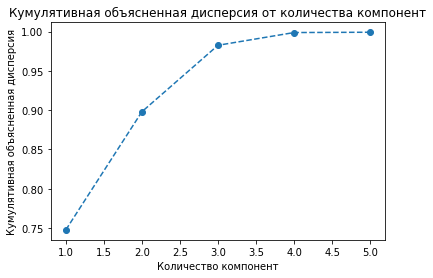

Матрица загрузок:
               PC1       PC2       PC3       PC4       PC5
age       0.039461  0.182186  0.125505  0.974046 -0.009427
sex      -0.001783  0.000794 -0.001065 -0.004635  0.078311
cp       -0.001537 -0.012542  0.006163  0.009262 -0.333646
trtbps    0.047588  0.103810  0.982278 -0.148034 -0.009790
chol      0.998053 -0.019425 -0.050865 -0.030251 -0.001344
fbs       0.000116  0.000462  0.003665  0.003434 -0.001464
restecg  -0.001552 -0.001202 -0.002710 -0.002959 -0.026307
thalachh -0.007358 -0.977189  0.128926  0.166484  0.024082
exng      0.000631  0.007548 -0.000029 -0.007024  0.111906
oldpeak   0.001330  0.017941  0.009214 -0.000803  0.782758
slp      -0.000100 -0.010427 -0.002302  0.003223 -0.231634
caa       0.001468  0.010110  0.004197  0.022350  0.419085
thall     0.001182  0.002592  0.001217 -0.000867  0.162995


In [212]:

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.title('Кумулятивная объясненная дисперсия от количества компонент')
plt.show()


loadings_matrix = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(pca.components_)+1)], index=X.columns)
print("Матрица загрузок:")
print(loadings_matrix)


## Полезные ссылки

1. [Хорошая статья на русском о PCA](https://habr.com/ru/post/304214/)
2. [sklearn PCA doc](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
3. [Выбор количества компонент](https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)
4. [PCA через сингулярное разложение](https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8)